In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from imblearn.combine import SMOTEENN
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, 
                            confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('final_data_V2.csv')  
X = data.drop(columns=['target'])
y = data['target']

In [3]:
smote_enn = SMOTEENN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

## Model Building

### Random Forest

In [7]:
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42)

rf_model.fit(X_train, y_train)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_y_pred = rf_model.predict(X_test)

In [8]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_auc_roc = roc_auc_score(y_test, rf_y_pred_proba)
rf_cm = confusion_matrix(y_test, rf_y_pred)

#### Performance Evaluation

In [10]:
print("Random Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"AUC-ROC: {rf_auc_roc:.4f}")

print("Confusion Matrix:")
print(rf_cm)

Random Forest Classifier:
Accuracy: 0.8987
Precision: 0.8996
Recall: 0.9656
AUC-ROC: 0.9589
Confusion Matrix:
[[17473  6371]
 [ 2035 57065]]


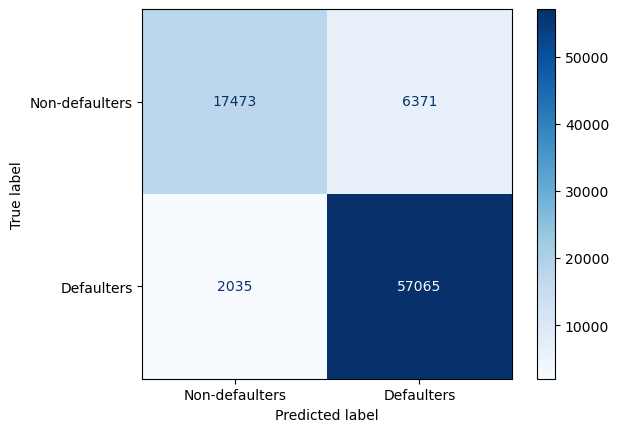

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Decision Tree

In [13]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=1, min_samples_split=2,
                                  min_impurity_decrease=0.01, max_leaf_nodes=None, class_weight=None, random_state=42)

dt_model.fit(X_train, y_train)
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
dt_y_pred = dt_model.predict(X_test)

In [14]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_auc_roc = roc_auc_score(y_test, dt_y_pred_proba)
dt_cm = confusion_matrix(y_test, dt_y_pred)

#### Performance Evaluation

In [16]:
print("Decision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"AUC-ROC: {dt_auc_roc:.4f}")

print("Confusion Matrix:")
print(dt_cm)

Decision Tree Classifier:
Accuracy: 0.7778
Precision: 0.7743
Recall: 0.9713
AUC-ROC: 0.7256
Confusion Matrix:
[[ 7106 16738]
 [ 1694 57406]]


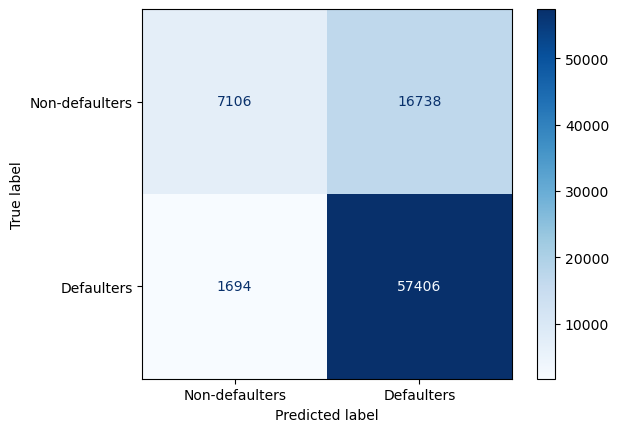

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### XGBoost

In [19]:
xgb_model = XGBClassifier(colsample_bytree=0.9, learning_rate=0.1, max_depth= 20, n_estimators=200, 
                          reg_alpha=1, reg_lambda=1.5, subsample=1.0, random_state=42)

xgb_model.fit(X_train, y_train)
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_y_pred = xgb_model.predict(X_test)

#### Performance Evaluation

In [21]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_proba)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

In [22]:
print("XGBoost Classifier:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"AUC-ROC: {xgb_auc_roc:.4f}")

print("Confusion Matrix:")
print(xgb_cm)

XGBoost Classifier:
Accuracy: 0.9156
Precision: 0.9478
Recall: 0.9330
AUC-ROC: 0.9726
Confusion Matrix:
[[20806  3038]
 [ 3959 55141]]


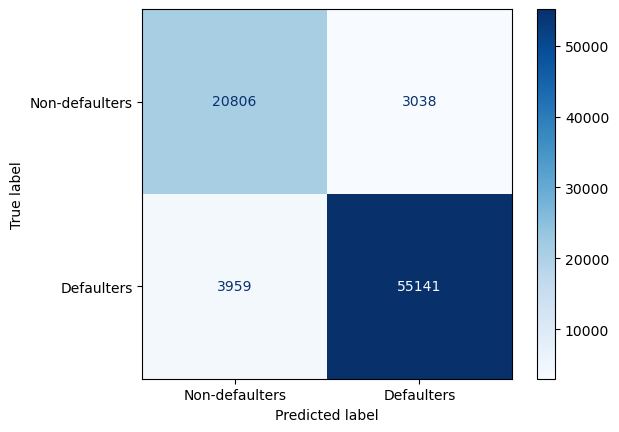

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Ada Boost

In [25]:
ada_model = AdaBoostClassifier(learning_rate=0.15, n_estimators=300, random_state=42)

ada_model.fit(X_train, y_train)
ada_y_pred_proba = ada_model.predict_proba(X_test)[:, 1]
ada_y_pred = ada_model.predict(X_test)

#### Performance Evaluation

In [27]:
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_precision = precision_score(y_test, ada_y_pred)
ada_recall = recall_score(y_test, ada_y_pred)
ada_auc_roc = roc_auc_score(y_test, ada_y_pred_proba)
ada_cm = confusion_matrix(y_test, ada_y_pred)

In [28]:
print("AdaBoost Classifier:")
print(f"Accuracy: {ada_accuracy:.4f}")
print(f"Precision: {ada_precision:.4f}")
print(f"Recall: {ada_recall:.4f}")
print(f"AUC-ROC: {ada_auc_roc:.4f}")
print("Confusion Matrix:")
print(ada_cm)

AdaBoost Classifier:
Accuracy: 0.8458
Precision: 0.8548
Recall: 0.9439
AUC-ROC: 0.9156
Confusion Matrix:
[[14367  9477]
 [ 3315 55785]]


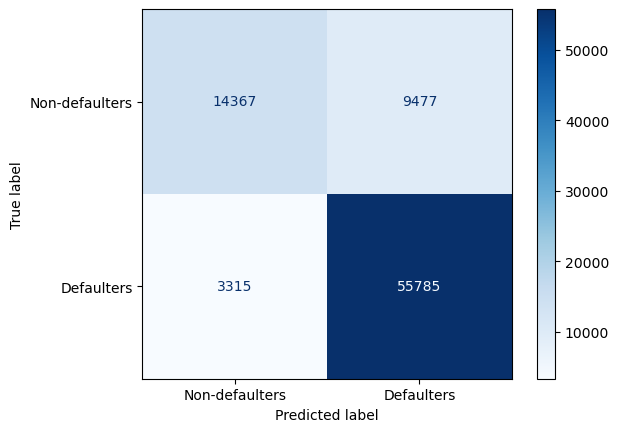

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=ada_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Multilayer Perceptron

In [31]:
mlp_model = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', early_stopping=True,
                          hidden_layer_sizes=(150, 150, 150), learning_rate='constant', solver='adam',
                          random_state=42)

mlp_model.fit(X_train, y_train)
mlp_y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
mlp_y_pred = mlp_model.predict(X_test)

#### Performance Evaluation

In [33]:
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred)
mlp_recall = recall_score(y_test, mlp_y_pred)
mlp_auc_roc = roc_auc_score(y_test, mlp_y_pred_proba)
mlp_cm = confusion_matrix(y_test, mlp_y_pred)

In [34]:
print("MLP Classifier:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"AUC-ROC: {mlp_auc_roc:.4f}")

print("Confusion Matrix:")
print(mlp_cm)

MLP Classifier:
Accuracy: 0.8775
Precision: 0.9008
Recall: 0.9305
AUC-ROC: 0.9305
Confusion Matrix:
[[17791  6053]
 [ 4110 54990]]


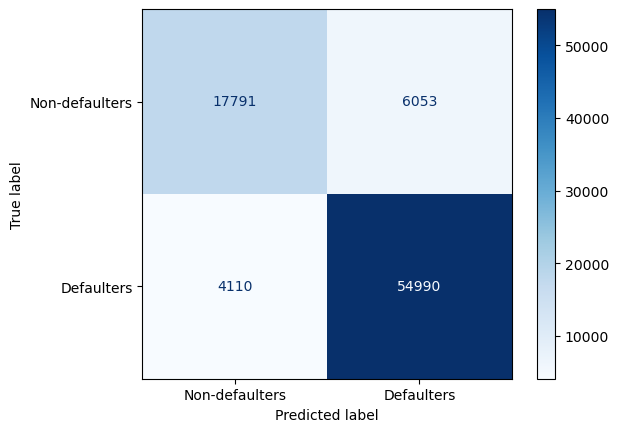

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

### SVM

In [37]:
svm_model = SVC(C= 1, degree=2, probability=True, gamma= 1, kernel= 'rbf', max_iter=10000, random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
svm_y_pred = svm_model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#### Performance Evaluation

In [39]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_auc_roc = roc_auc_score(y_test, svm_y_pred_proba)
svm_cm = confusion_matrix(y_test, svm_y_pred)

In [40]:
print("SVM Classifier:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"AUC-ROC: {svm_auc_roc:.4f}")

print("Confusion Matrix:")
print(svm_cm)

SVM Classifier:
Accuracy: 0.7318
Precision: 0.9476
Recall: 0.6601
AUC-ROC: 0.8824
Confusion Matrix:
[[21686  2158]
 [20091 39009]]


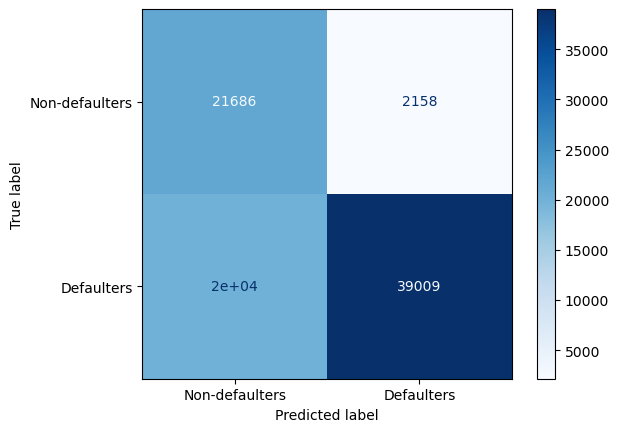

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Non-defaulters', 'Defaulters'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Comparing all Models - Individual

### Evaluation Metrics

In [44]:
results = {
    'Model': ['Random Forest', 'XGBoost', 'MLP', 'Decision Tree', 'AdaBoost', 'SVM'],
    'Accuracy': [rf_accuracy, xgb_accuracy, mlp_accuracy, dt_accuracy, ada_accuracy, svm_accuracy],
    'Precision': [rf_precision, xgb_precision, mlp_precision, dt_precision, ada_precision, svm_precision],
    'Recall': [rf_recall, xgb_recall, mlp_recall, dt_recall, ada_recall, svm_recall],
    'AUC-ROC': [rf_auc_roc, xgb_auc_roc, mlp_auc_roc, dt_auc_roc, ada_auc_roc, svm_auc_roc],
}

results = pd.DataFrame(results)
results

,Model,Accuracy,Precision,Recall,AUC-ROC
0,Random Forest,0.898655,0.899568,0.965567,0.958871
1,XGBoost,0.915642,0.947782,0.933012,0.972580
2,MLP,0.877472,0.900840,0.930457,0.930507
3,Decision Tree,0.777778,0.774250,0.971337,0.725562
4,AdaBoost,0.845775,0.854785,0.943909,0.915581
5,SVM,0.731759,0.947579,0.660051,0.882393


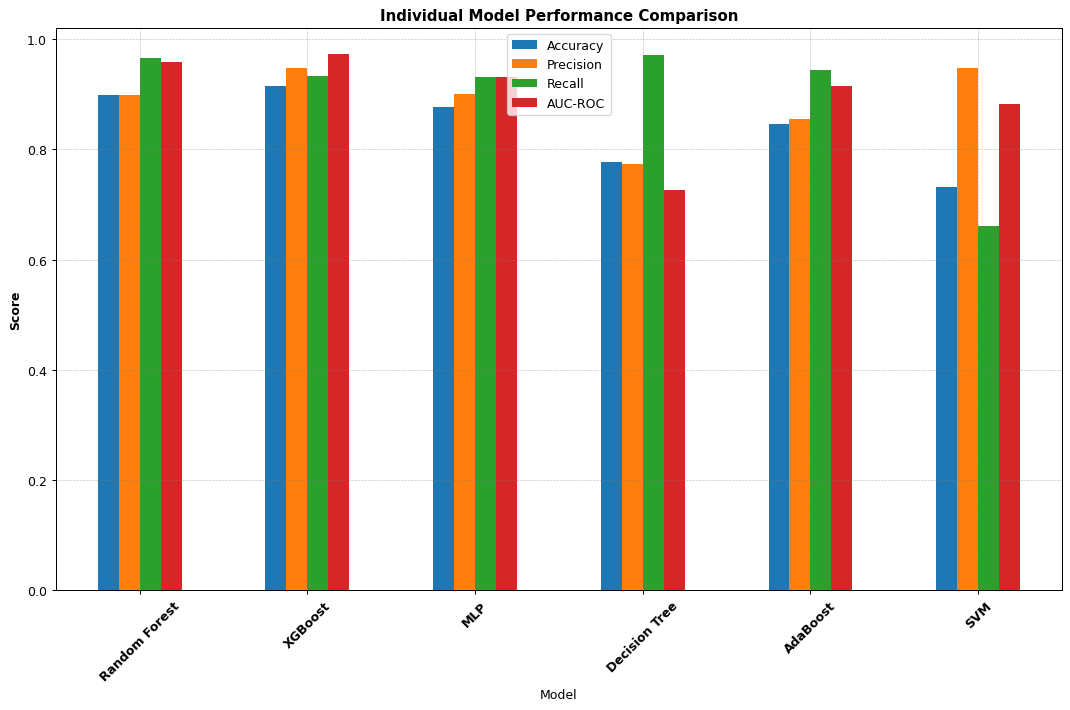

In [45]:
vfig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=90)
results.set_index('Model').plot(kind='bar', ax=ax)
ax.set_title('Individual Model Performance Comparison',fontweight='bold')
ax.set_ylabel('Score',fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Learning Curve - Check for Overfitting

In [47]:
def plot_learning_curve(model, X_train, y_train, cv=5, scoring='recall'):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, 
                                                            scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10),
                                                            n_jobs=-1)
    
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, mean_test_scores, 'o-', color='g', label='Cross-validation score')
    
    plt.title(f'Learning Curve: {type(model).__name__}')
    plt.xlabel('Training Examples')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [48]:
models = [
    ('Random Forest', rf_model),
    ('Decision Tree', dt_model),
    ('XGBoost', xgb_model),
    ('AdaBoost', ada_model),
    ('MLP', mlp_model),
    ('SVM', svm_model)
]
model_auc_scores = {}

In [49]:
# for name, model in models:
#     print(f"Plotting learning curve for {name}...")
#     plot_learning_curve(model, X_train, y_train)

### Roc Curve

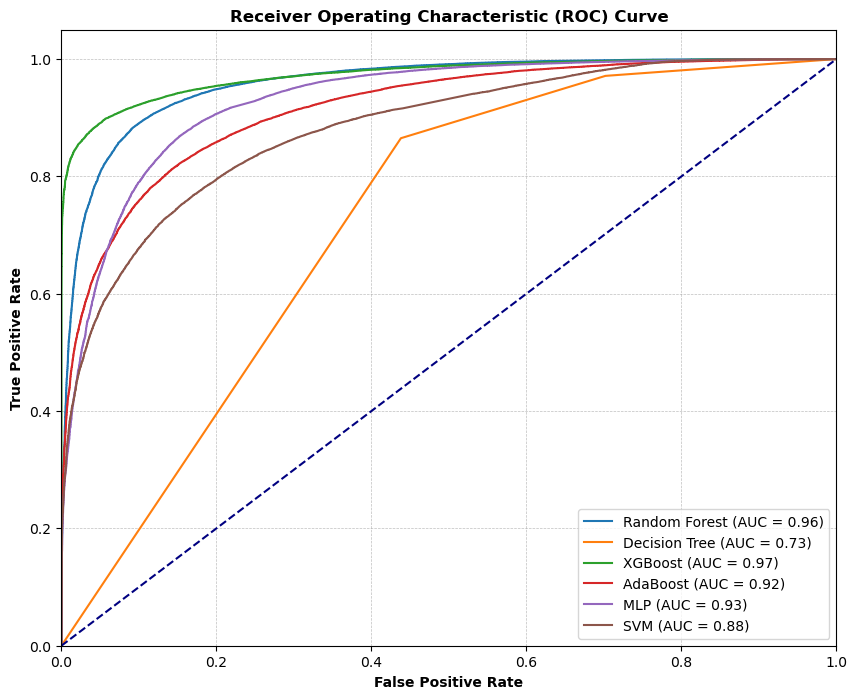

In [51]:
plt.figure(figsize=(10, 8))

for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)     
    roc_auc = auc(fpr, tpr)                           
    model_auc_scores[name] = roc_auc                  
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc='lower right')
plt.show()

In [52]:
for name, auc_score in model_auc_scores.items():
    print(f"{name} AUC: {auc_score:.4f}")

Random Forest AUC: 0.9589
Decision Tree AUC: 0.7256
XGBoost AUC: 0.9726
AdaBoost AUC: 0.9156
MLP AUC: 0.9305
SVM AUC: 0.8824


## Ensemble Method

### Voting

#### All Models

In [56]:
voting_A = VotingClassifier(estimators=[('Random Forest', rf_model),
                                        ('Decision Tree', dt_model),
                                        ('XGBoost', xgb_model),
                                        ('AdaBoost', ada_model),
                                        ('MLP', mlp_model),
                                        ('SVM', svm_model)
                                       ], voting='soft')

In [57]:
voting_A.fit(X_train, y_train)
voting_y_pred_proba = voting_A.predict_proba(X_test)[:, 1]
voting_y_pred = voting_A.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [58]:
voting_accuracy = accuracy_score(y_test, voting_y_pred)
voting_precision = precision_score(y_test, voting_y_pred)
voting_recall = recall_score(y_test, voting_y_pred)
voting_auc_roc = roc_auc_score(y_test, voting_y_pred_proba)
voting_cm = confusion_matrix(y_test, voting_y_pred)

In [59]:
print("Voting All Performance:")
print(f"Accuracy: {voting_accuracy:.4f}")
print(f"Precision: {voting_precision:.4f}")
print(f"Recall: {voting_recall:.4f}")
print(f"AUC ROC: {voting_auc_roc:.4f}")
print(f"Confusion Matrix:\n{voting_cm}")

Voting All Performance:
Accuracy: 0.9109
Precision: 0.9099
Recall: 0.9710
AUC ROC: 0.9703
Confusion Matrix:
[[18163  5681]
 [ 1711 57389]]


#### 3 Best Performing Models

In [61]:
voting_B = VotingClassifier(estimators=[('Random Forest', rf_model),
                                        ('XGBoost', xgb_model),
                                        ('MLP', mlp_model),
                                       ], voting='soft')
voting_B.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('MLP',
                              MLPClassifier(alpha=0.001, early_stopping=True,
                                            hidden_layer_sizes=(150, 150, 150),
                                            random_state=42))],
                 voting='soft')

In [62]:
voting_B.fit(X_train, y_train)
voting_y_pred_proba_3 = voting_B.predict_proba(X_test)[:, 1]
voting_y_pred_3 = voting_B.predict(X_test)

In [63]:
voting_accuracy_3 = accuracy_score(y_test, voting_y_pred_3)
voting_precision_3 = precision_score(y_test, voting_y_pred_3)
voting_recall_3 = recall_score(y_test, voting_y_pred_3)
voting_auc_roc_3 = roc_auc_score(y_test, voting_y_pred_proba_3)
voting_cm_3 = confusion_matrix(y_test, voting_y_pred_3)

In [64]:
print("Voting RF, XGB, MLP Performance:")
print(f"Accuracy: {voting_accuracy_3:.4f}")
print(f"Precision: {voting_precision_3:.4f}")
print(f"Recall: {voting_recall_3:.4f}")
print(f"AUC ROC: {voting_auc_roc_3:.4f}")
print(f"Confusion Matrix:\n{voting_cm_3}")

Voting RF, XGB, MLP Performance:
Accuracy: 0.9166
Precision: 0.9314
Recall: 0.9532
AUC ROC: 0.9687
Confusion Matrix:
[[19693  4151]
 [ 2763 56337]]


### Stacking

#### All Models

In [67]:
Method_A = [('Random Forest', rf_model),
               ('Decision Tree', dt_model),
               ('XGBoost', xgb_model),
               ('AdaBoost', ada_model),
               ('MLP', mlp_model),
               ('SVM', svm_model)
]

stacking_A = StackingClassifier(estimators=Method_A, 
                                final_estimator=LogisticRegression(), cv=5)

In [68]:
stacking_A.fit(X_train, y_train)
stacking_y_pred_proba = stacking_A.predict_proba(X_test)[:, 1]
stacking_y_pred = stacking_A.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (m

In [72]:
stacking_accuracy = accuracy_score(y_test, stacking_y_pred)
stacking_precision = precision_score(y_test, stacking_y_pred)
stacking_recall = recall_score(y_test, stacking_y_pred)
stacking_auc_roc = roc_auc_score(y_test, stacking_y_pred_proba)

In [74]:
print("All Performance:")
print(f"Accuracy: {stacking_accuracy:.4f}")
print(f"Precision: {stacking_precision:.4f}")
print(f"Recall: {stacking_recall:.4f}")
print(f"AUC ROC: {stacking_auc_roc:.4f}")

All Performance:
Accuracy: 0.9369
Precision: 0.9560
Recall: 0.9555
AUC ROC: 0.9781


#### 3 Best Performing Models

In [77]:
Method_B = [('Random Forest', rf_model),
               ('XGBoost', xgb_model),
               ('MLP', mlp_model)
]

stacking_B = StackingClassifier(estimators=Method_B, 
                                final_estimator=LogisticRegression(), cv=5)

In [79]:
stacking_B.fit(X_train, y_train)
stacking_y_pred_proba_3 = stacking_B.predict_proba(X_test)[:, 1]
stacking_y_pred_3 = stacking_B.predict(X_test)

In [80]:
stacking_accuracy_3 = accuracy_score(y_test, stacking_y_pred_3)
stacking_precision_3 = precision_score(y_test, stacking_y_pred_3)
stacking_recall_3 = recall_score(y_test, stacking_y_pred_3)
stacking_auc_roc_3 = roc_auc_score(y_test, stacking_y_pred_proba_3)

In [81]:
print("RF, XGB, MLP Performance:")
print(f"Accuracy: {stacking_accuracy_3:.4f}")
print(f"Precision: {stacking_precision_3:.4f}")
print(f"Recall: {stacking_recall_3:.4f}")
print(f"AUC ROC: {stacking_auc_roc_3:.4f}")

RF, XGB, MLP Performance:
Accuracy: 0.9188
Precision: 0.9409
Recall: 0.9454
AUC ROC: 0.9708


## Comparing all Models - Ensemble

In [83]:
results_f = {
    'Model': ['Random Forest', 'XGBoost', 'MLP', 'Decision Tree', 'AdaBoost', 'SVM', 'Voting A', 'Voting B', 'Stacking A', 'Stacking B'],
    'Accuracy': [rf_accuracy, xgb_accuracy, mlp_accuracy, dt_accuracy, ada_accuracy, svm_accuracy, voting_accuracy, voting_accuracy_3, stacking_accuracy, stacking_accuracy_3],
    'Precision': [rf_precision, xgb_precision, mlp_precision, dt_precision, ada_precision, svm_precision, voting_precision, voting_precision_3, stacking_precision, stacking_precision_3],
    'Recall': [rf_recall, xgb_recall, mlp_recall, dt_recall, ada_recall, svm_recall, voting_recall, voting_recall_3, stacking_recall, stacking_recall_3],
    'AUC-ROC': [rf_auc_roc, xgb_auc_roc, mlp_auc_roc, dt_auc_roc, ada_auc_roc, svm_auc_roc, voting_auc_roc, voting_auc_roc_3, stacking_auc_roc, stacking_auc_roc_3]
}

results_final = pd.DataFrame(results_f)
results_final

,Model,Accuracy,Precision,Recall,AUC-ROC
0,Random Forest,0.898655,0.899568,0.965567,0.958871
1,XGBoost,0.915642,0.947782,0.933012,0.972580
2,MLP,0.877472,0.900840,0.930457,0.930507
3,Decision Tree,0.777778,0.774250,0.971337,0.725562
4,AdaBoost,0.845775,0.854785,0.943909,0.915581
5,SVM,0.731759,0.947579,0.660051,0.882393
6,Voting A,0.910880,0.909925,0.971049,0.970346
7,Voting B,0.916643,0.931375,0.953249,0.968733
8,Stacking A,0.936921,0.955952,0.955499,0.978124
9,Stacking B,0.918849,0.940943,0.945448,0.970827


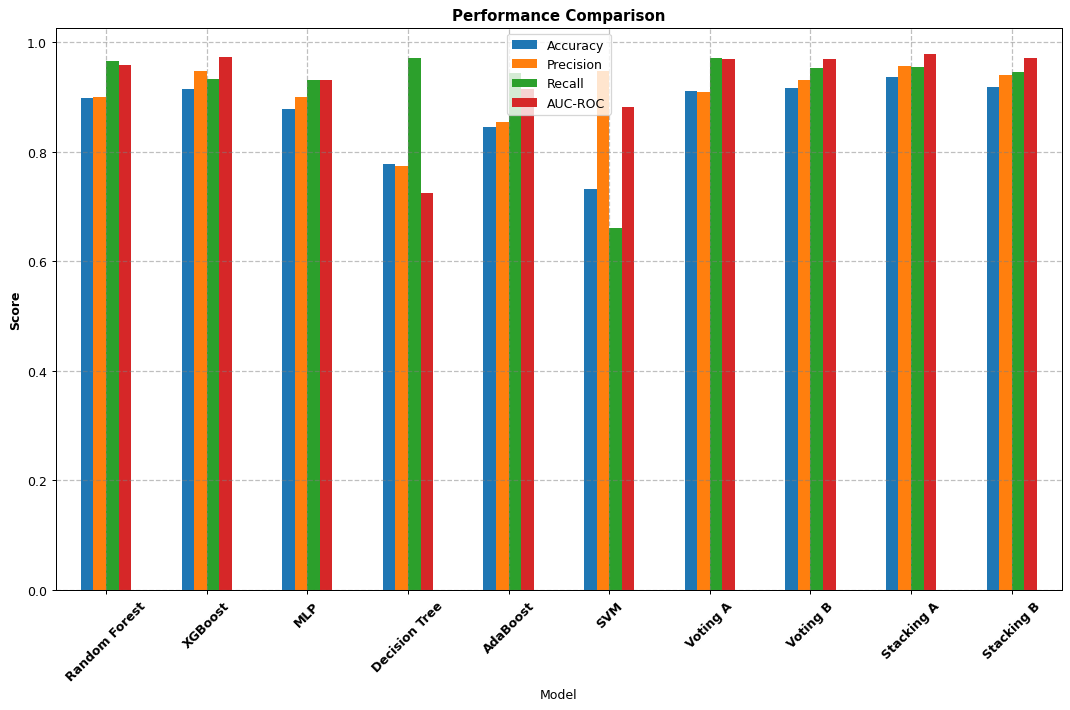

In [84]:
vfig, ax = plt.subplots(1, 1, figsize=(12, 8), dpi=90)
results_final.set_index('Model').plot(kind='bar', ax=ax)
ax.set_title('Performance Comparison',fontweight='bold')
ax.set_ylabel('Score',fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [88]:
models = [
    ('Random Forest', rf_model),
    ('Decision Tree', dt_model),
    ('XGBoost', xgb_model),
    ('AdaBoost', ada_model),
    ('MLP', mlp_model),
    ('SVM', svm_model),
    ('Voting A', voting_A),
    ('Voting B', voting_B),
    ('Stacking A', stacking_A),
    ('Stacking B', stacking_B)
]
model_auc_scores = {}

### Roc Curve

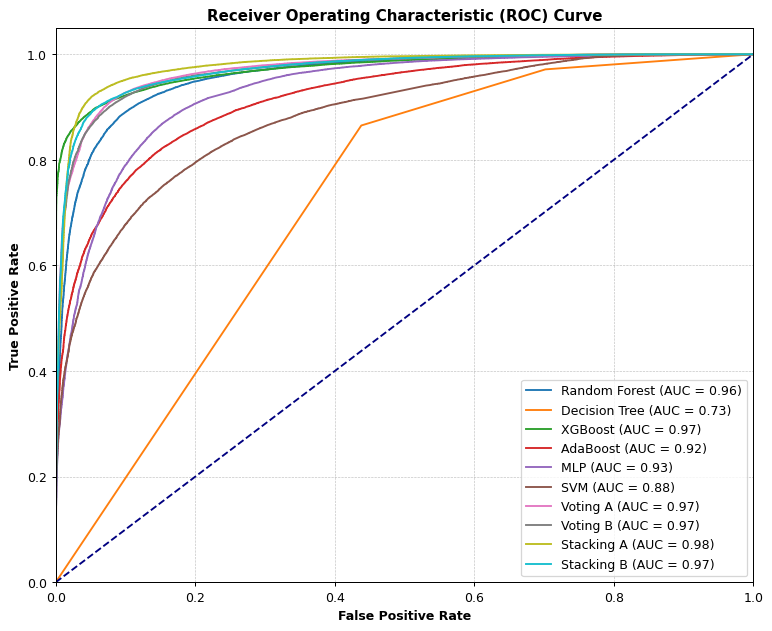

In [90]:
plt.figure(figsize=(10, 8), dpi=90)

for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)     
    roc_auc = auc(fpr, tpr)                           
    model_auc_scores[name] = roc_auc                  
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontweight='bold')
plt.ylabel('True Positive Rate',fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc='lower right')
plt.show()

## Saving Model

In [8]:
import joblib

In [10]:
features = X_train.columns.tolist()

In [12]:
# saving the stacking model and the required features
joblib.dump(stacking_A, 'stacking_model.pkl')
joblib.dump(features, 'expected_feature.pkl')

['expected_feature.pkl']